In [563]:
import pandas as pd

In [564]:
import numpy as np

In [565]:
import seaborn as sns

In [566]:
import matplotlib.pyplot as plt

In [567]:
import warnings

In [568]:
warnings.filterwarnings('ignore')

In [569]:
df=pd.read_csv('loan_prediction.csv')

In [570]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


There are 614 rows and 13 columns. 13th column i.e Loan_status is our target variable.

In [571]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 4 columns with float,one with integer datatype and other are object datatype

In [572]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [574]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Dependents, Self Employed , Loan amount, loan_amount_term and Credit history columns have null data in them

In [575]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Loan amount term have same 25th,50th and 75th percentile and Credit History has same 25th 50th 75th percentile and maximum value

(array([422.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

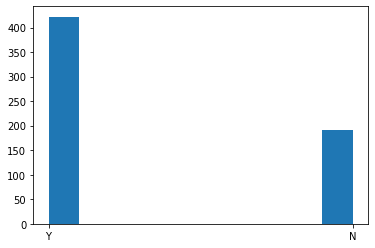

In [576]:
plt.hist(df['Loan_Status'])

In [577]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 applications for loan were accepted and 192 rejected.There is no class imbalance in the dataset

In [578]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [579]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [580]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [581]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [582]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [583]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [584]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [585]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [586]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [587]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [588]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [589]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [590]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

We have filled missing values in categorical variables using mode 

In [591]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

We have replaced numerical variable with the median value

In [592]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [593]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

We see that loan amount term is not continuous . It is having discrete values. Thus we use mode value of the column to replace missing values

In [594]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [595]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values have been filled

(array([502.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

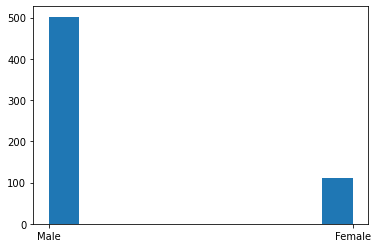

In [596]:
plt.hist(df['Gender'])

In [597]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Most of the applicants are male

(array([213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 401.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

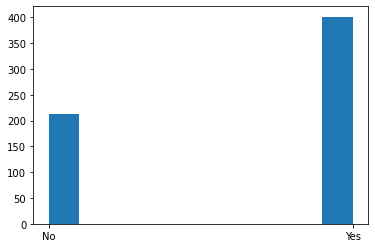

In [598]:
plt.hist(df['Married'])

In [599]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Most of the applicants are married

(array([360.,   0.,   0., 102.,   0.,   0., 101.,   0.,   0.,  51.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

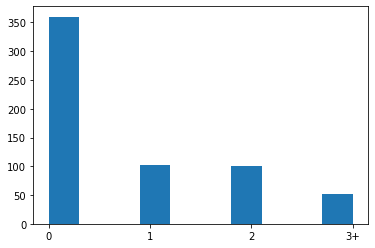

In [600]:
plt.hist(df['Dependents'])

In [601]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Most of the applicants don't have dependents

(array([532.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  82.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

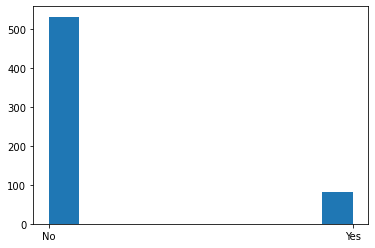

In [602]:
plt.hist(df['Self_Employed'])

In [603]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Most of the applicants are not self employed

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

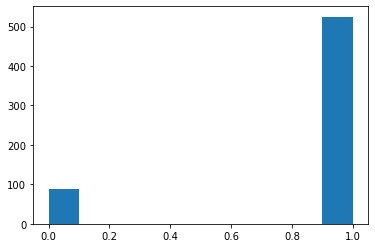

In [604]:
plt.hist(df['Credit_History'])

In [605]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Most of the applicants have good credit history

(array([480.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 134.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

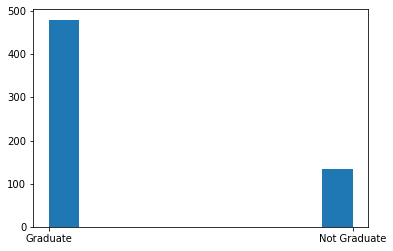

In [606]:
plt.hist(df['Education'])

In [607]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Most of the applicants are graduate

(array([202.,   0.,   0.,   0.,   0., 179.,   0.,   0.,   0., 233.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

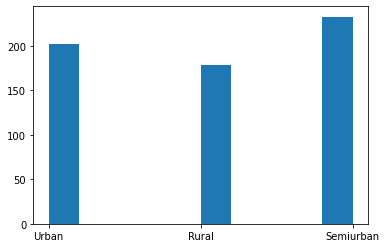

In [608]:
plt.hist(df['Property_Area'])

In [609]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Semiurban and urban have more applicants

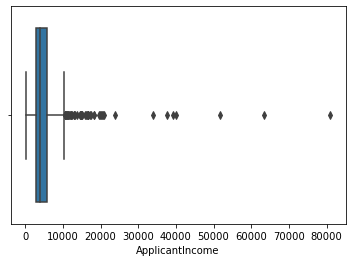

In [610]:
sns.boxplot(df['ApplicantIncome'])

There are outliers in ApplicantIncome

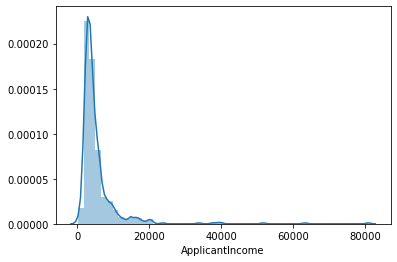

In [611]:
sns.distplot(df['ApplicantIncome'])

The data is right skewed

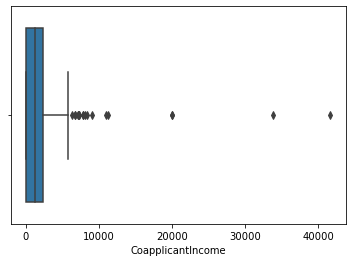

In [612]:
sns.boxplot(df['CoapplicantIncome'])

There are outlieres in coapplicant income

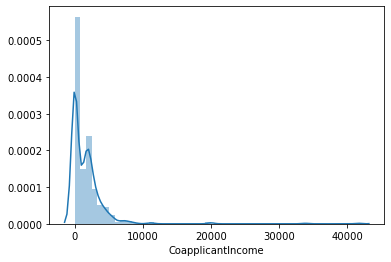

In [613]:
sns.distplot(df['CoapplicantIncome'])

THe data is right skewed

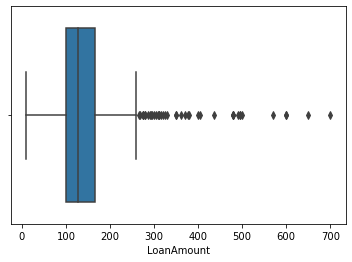

In [614]:
sns.boxplot(df['LoanAmount'])

There are outliers in Loan AMount

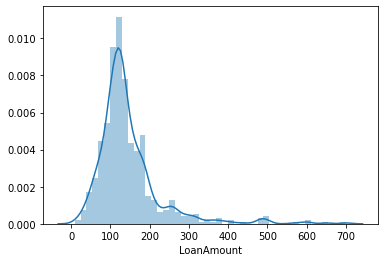

In [615]:
sns.distplot(df['LoanAmount'])

The data is right skewed

In [616]:
df['LoanAmount']=np.log(df['LoanAmount'])

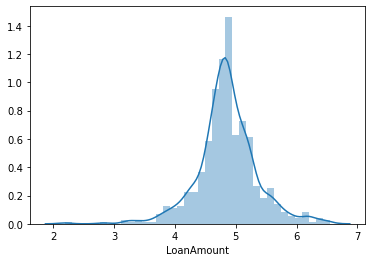

In [617]:
sns.distplot(df['LoanAmount'])

In [618]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

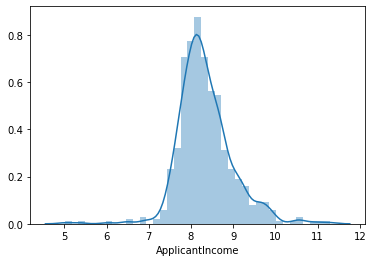

In [619]:
sns.distplot(df['ApplicantIncome'])

Removed skewness in the data and outliers have been reduced

In [620]:
from sklearn.preprocessing import LabelEncoder

In [621]:
LE=LabelEncoder()

In [622]:
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

In [623]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.852030,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,0.0,4.262680,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,8.320205,0.0,3.688879,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8.996157,240.0,5.533389,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,8.933664,0.0,5.231109,360.0,1.0,Urban,1


In [624]:
df['Dependents'].replace('3+',3,inplace=True)

In [625]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.852030,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,0.0,4.262680,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,8.320205,0.0,3.688879,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8.996157,240.0,5.533389,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,8.933664,0.0,5.231109,360.0,1.0,Urban,1


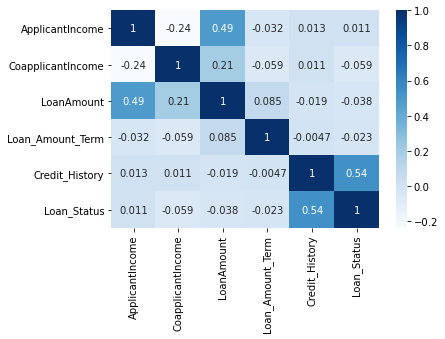

In [626]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Multicollinearity is not present

In [627]:
df.drop('Loan_ID',axis=1,inplace=True)

In [628]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,4.852030,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.0,4.262680,360.0,1.0,Rural,1
610,Male,Yes,3,Graduate,No,8.320205,0.0,3.688879,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8.996157,240.0,5.533389,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,8.933664,0.0,5.231109,360.0,1.0,Urban,1


In [629]:
df['Gender']=LE.fit_transform(df['Gender'])

In [630]:
df['Married']=LE.fit_transform(df['Married'])

In [631]:
df['Education']=LE.fit_transform(df['Education'])

In [632]:
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])

In [633]:
df['Property_Area']=LE.fit_transform(df['Property_Area'])

In [634]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.852030,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0,1
610,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0,1
611,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2,1
612,1,1,2,0,0,8.933664,0.0,5.231109,360.0,1.0,2,1


Converted all data into numerical form

In [635]:
df.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [636]:
x_unsc=df.drop('Loan_Status',axis=1)

In [637]:
x_unsc.shape

(614, 11)

In [638]:
y=df['Loan_Status']

In [639]:
y.shape

(614,)

In [640]:
from sklearn.preprocessing import MinMaxScaler

In [641]:
mn=MinMaxScaler()

In [642]:
x=mn.fit_transform(x_unsc)

In [643]:
from sklearn.model_selection import train_test_split

In [644]:
from sklearn.linear_model import LogisticRegression

In [645]:
from sklearn.metrics import accuracy_score

In [646]:
maxAccu=0

In [647]:
maxRs=0

In [648]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    acc_lr=accuracy_score(y_test,pred_lr)
if acc_lr>maxAccu:
    maxAccu=acc_lr
    maxRs=i
print('Best Accuracy Score is ',maxAccu,'on Random State',maxRs)

Best Accuracy Score is  0.7891891891891892 on Random State 199


In [649]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)


In [650]:
LR=LogisticRegression()

In [651]:
LR.fit(x_train,y_train)


LogisticRegression()

In [652]:
pred_LR=LR.predict(x_test)


In [653]:
from sklearn.metrics import classification_report

In [654]:
cla_LR=classification_report(y_test,pred_LR)


In [655]:
print(cla_LR)


              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [656]:
from sklearn.metrics import confusion_matrix


In [657]:
acc_LR=accuracy_score(y_test,pred_LR)


In [658]:
con_LR=confusion_matrix(y_test,pred_LR)


In [659]:
print(acc_LR)

0.7891891891891892


In [660]:
print(con_LR)

[[ 24  37]
 [  2 122]]


In [661]:
from sklearn.ensemble import RandomForestClassifier


In [662]:
RFC=RandomForestClassifier()


In [663]:
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [664]:
pred_RFC=RFC.predict(x_test)


In [665]:
cla_RFC=classification_report(y_test,pred_RFC)


In [666]:
print(cla_RFC)


              precision    recall  f1-score   support

           0       0.80      0.46      0.58        61
           1       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.79      0.70      0.72       185
weighted avg       0.79      0.78      0.76       185



In [667]:
acc_RFC=accuracy_score(y_test,pred_RFC)


In [668]:
print(acc_RFC)

0.7837837837837838


In [669]:
con_RFC=confusion_matrix(y_test,pred_RFC)


In [670]:
print(con_RFC)

[[ 28  33]
 [  7 117]]


In [671]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()


In [672]:
DTC.fit(x_train,y_train)


DecisionTreeClassifier()

In [673]:
pred_DTC=DTC.predict(x_test)


In [674]:
cla_DTC=classification_report(y_test,pred_DTC)
acc_DTC=accuracy_score(y_test,pred_DTC)
con_DTC=confusion_matrix(y_test,pred_DTC)

In [675]:
print(acc_DTC)
print(cla_DTC)
print(con_DTC)

0.6918918918918919
              precision    recall  f1-score   support

           0       0.53      0.61      0.56        61
           1       0.79      0.73      0.76       124

    accuracy                           0.69       185
   macro avg       0.66      0.67      0.66       185
weighted avg       0.70      0.69      0.70       185

[[37 24]
 [33 91]]


In [676]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=5)


In [677]:
KNN.fit(x_train,y_train)


KNeighborsClassifier()

In [678]:
pred_KNN=KNN.predict(x_test)


In [679]:
cla_KNN=classification_report(y_test,pred_KNN)


In [680]:
print(cla_KNN)

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        61
           1       0.76      0.88      0.82       124

    accuracy                           0.74       185
   macro avg       0.70      0.66      0.67       185
weighted avg       0.72      0.74      0.72       185



In [681]:
acc_KNN=accuracy_score(y_test,pred_KNN)


In [682]:
print(acc_KNN)

0.7351351351351352


In [683]:
con_KNN=confusion_matrix(y_test,pred_KNN)


In [684]:
print(con_KNN)

[[ 27  34]
 [ 15 109]]


In [685]:
from sklearn.model_selection import cross_val_score


In [686]:
print(cross_val_score(DTC,x,y,cv=5).mean())


0.7296681327469012


In [687]:
print(cross_val_score(KNN,x,y,cv=5).mean())


0.7866853258696522


In [688]:
print(cross_val_score(RFC,x,y,cv=5).mean())


0.7752499000399841


In [689]:
print(cross_val_score(LR,x,y,cv=5).mean())


0.809462881514061


Best model is Logistic Regression

Hyperparameter tuning

In [690]:
from sklearn.model_selection import GridSearchCV


In [691]:
parameter={'penalty':['l1','l2','elasticnet','none'],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'warm_start':['True','False'],'multi_class':['auto','ovr','multinomial']}


In [692]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)


In [693]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': ['True', 'False']})

In [694]:
GCV.best_params_

{'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'warm_start': 'True'}

In [695]:
Final_mod=LogisticRegression(multi_class='auto',penalty='l1',solver='liblinear',warm_start=True)


In [696]:
Final_mod.fit(x_train,y_train)


LogisticRegression(penalty='l1', solver='liblinear', warm_start=True)

In [697]:
pred_fin=Final_mod.predict(x_test)


In [698]:
acc_fin=accuracy_score(y_test,pred_fin)


In [699]:
print(acc_fin)

0.7891891891891892


In [700]:
from sklearn.metrics import roc_curve


In [701]:
from sklearn.metrics import roc_auc_score


In [702]:
y_pred_prob=LR.predict_proba(x_test)[:,1]


In [703]:
y_pred_prob


array([0.78385683, 0.8931616 , 0.76217316, 0.62840775, 0.65873273,
       0.82390516, 0.69700936, 0.83614007, 0.76503969, 0.83127387,
       0.83239639, 0.78140542, 0.7771749 , 0.15586713, 0.68941149,
       0.88228664, 0.8760267 , 0.87119526, 0.68985825, 0.15240935,
       0.83001439, 0.68658522, 0.13110898, 0.83399425, 0.17140166,
       0.75340879, 0.83318203, 0.82830915, 0.83465835, 0.82792131,
       0.84258526, 0.66955559, 0.82515391, 0.83528884, 0.20565108,
       0.83272031, 0.79477766, 0.77472856, 0.0576754 , 0.66966214,
       0.82624477, 0.7856065 , 0.83467765, 0.83633241, 0.11193119,
       0.68181385, 0.82525355, 0.83169285, 0.08495702, 0.77462188,
       0.75396736, 0.65099657, 0.83485024, 0.815762  , 0.88019025,
       0.61441085, 0.71678471, 0.29695346, 0.61674656, 0.6991182 ,
       0.88353868, 0.68430006, 0.68163945, 0.15152422, 0.83818003,
       0.82455362, 0.75793645, 0.74760721, 0.82285477, 0.8152245 ,
       0.6094505 , 0.82000346, 0.83426508, 0.83156564, 0.61381

In [704]:
y_pred_prob.shape


(185,)

In [705]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)


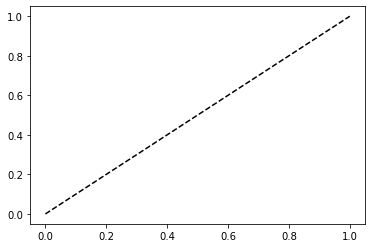

In [706]:
plt.plot([0,1],[0,1],'k--')


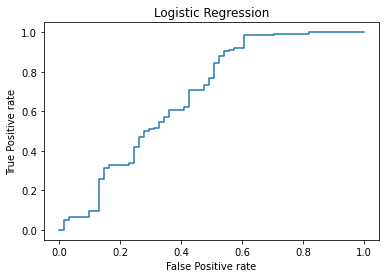

In [707]:
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistic Regression')
plt.show()

In [708]:
auc_score=roc_auc_score(y_test,LR.predict(x_test))


In [709]:
auc_score


0.6886567953463776

In [710]:
import joblib


In [711]:
joblib.dump(Final_mod,'Loanpred.pkl')


['Loanpred.pkl']